# LIBRARIES

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# DATASET

In [91]:
df = pd.read_csv(
    r"C:\Users\User\Desktop\New folder\data\ecommerce_sales_data.csv"
)

df.head()

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
0,12/31/2024,Printer,Office,North,4,3640,348.93
1,11/27/2022,Mouse,Accessories,East,7,1197,106.53
2,5/11/2022,Tablet,Electronics,South,5,5865,502.73
3,3/16/2024,Mouse,Accessories,South,2,786,202.87
4,9/10/2022,Mouse,Accessories,West,1,509,103.28


# ANALIZATION

In [92]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year

sales_by_year = pd.pivot_table(
    df,
    values='Sales',
    index='Year',
    aggfunc='sum'
)

print(sales_by_year)


        Sales
Year         
2022  3255970
2023  3786592
2024  3625319


In [61]:
profit_by_region = pd.pivot_table(
    df,
    values='Profit',
    index='Region',
    aggfunc='sum'
)

print(profit_by_region)


           Profit
Region           
East    464888.46
North   426314.75
South   458103.27
West    495358.73


In [93]:
profit_by_region_year = pd.pivot_table(
    df,
    values='Profit',
    index='Region',
    columns='Year',
    aggfunc='sum',
      fill_value=0
)

print(profit_by_region_year)


Year         2022       2023       2024
Region                                 
East    155471.52  153629.76  155787.18
North   130057.85  161174.38  135082.52
South   143618.92  175862.35  138622.00
West    143708.69  176199.93  175450.11


In [94]:
sales_category_year = pd.pivot_table(
    df,
    values='Sales',
    index='Year',
    columns='Category',
    aggfunc='sum'
)

print(sales_category_year)


Category  Accessories  Electronics  Office
Year                                      
2022          1329731      1616149  310090
2023          1495723      1881367  409502
2024          1422137      1828558  374624


In [95]:
profit_by_product = pd.pivot_table(
    df,
    values='Profit',
    index='Product Name',  
    aggfunc='sum'
)

profit_by_product = profit_by_product.sort_values(by='Profit', ascending=False) # Display in asceinding order
print(profit_by_product)


                 Profit
Product Name           
Camera        207630.99
Monitor       202028.17
Mouse         185763.69
Laptop        185756.81
Printer       185394.88
Smartphone    183296.97
Smartwatch    178995.81
Keyboard      175814.68
Headphones    172478.20
Tablet        167505.01


In [96]:
quantity_product_category = pd.pivot_table(
    df,
    values='Quantity',
    index=['Category', 'Product Name'],
    aggfunc='sum'
).reset_index()

print(quantity_product_category)

      Category Product Name  Quantity
0  Accessories   Headphones      1604
1  Accessories     Keyboard      1684
2  Accessories      Monitor      1876
3  Accessories        Mouse      1753
4  Electronics       Camera      1795
5  Electronics       Laptop      1658
6  Electronics   Smartphone      1617
7  Electronics   Smartwatch      1807
8  Electronics       Tablet      1733
9       Office      Printer      1734


# VISUALIZATION

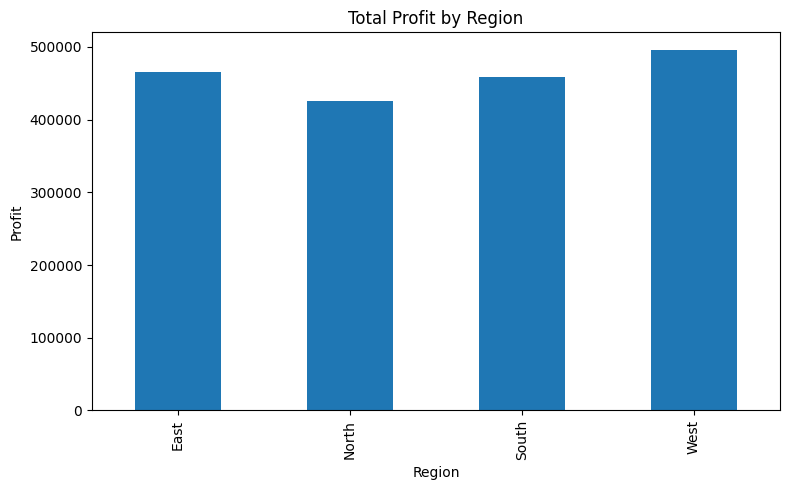

In [97]:
profit_by_region.plot(kind='bar', figsize=(8,5), legend=False)
plt.title("Total Profit by Region")
plt.xlabel("Region")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()

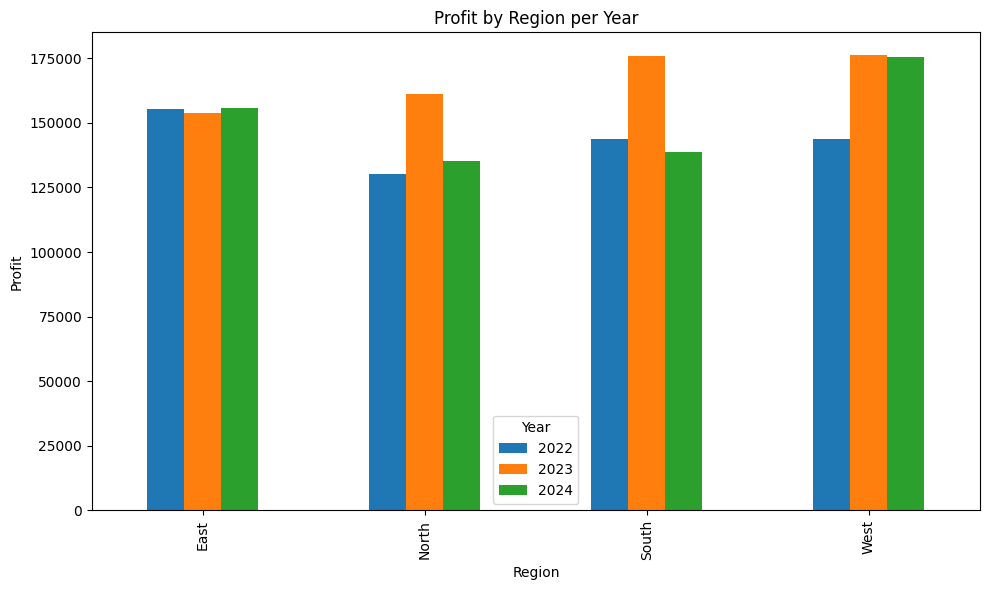

In [98]:
profit_by_region_year.plot(kind='bar', figsize=(10,6))
plt.title("Profit by Region per Year")
plt.xlabel("Region")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()


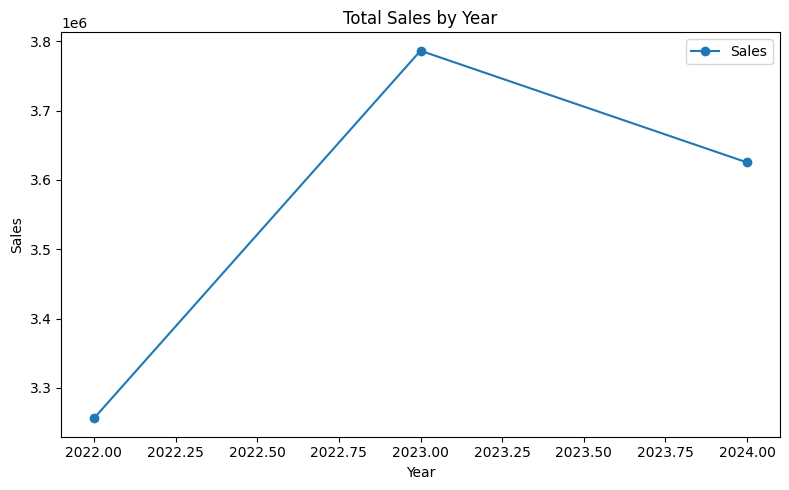

In [99]:
sales_by_year.plot(kind='line', marker='o', figsize=(8,5))
plt.title("Total Sales by Year")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

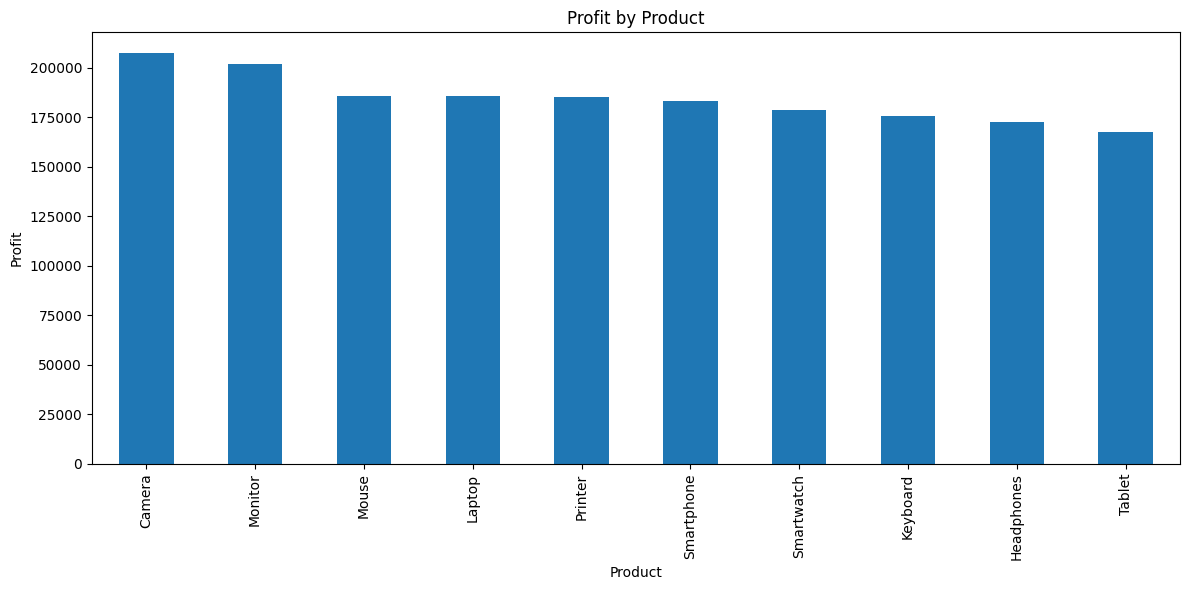

In [100]:
profit_by_product.plot(kind='bar', figsize=(12,6), legend=False)
plt.title("Profit by Product")
plt.xlabel("Product")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()


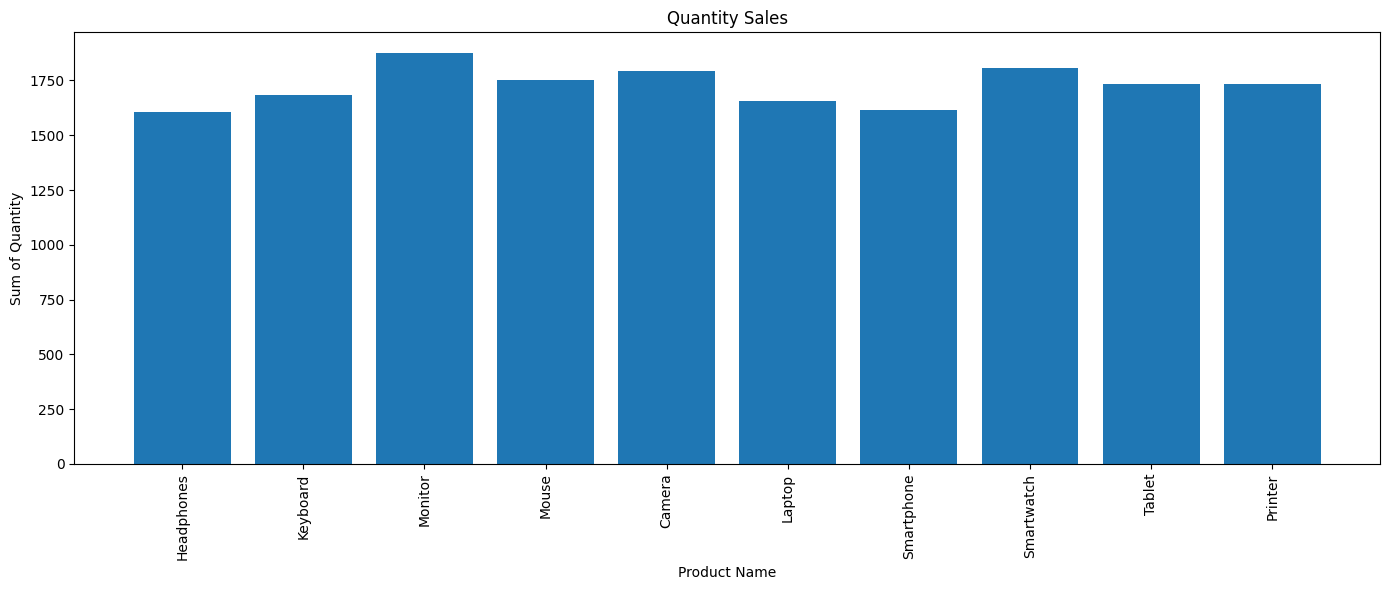

In [101]:
quantity_product_category = quantity_product_category.sort_values(
    by=['Category', 'Product Name']
)

# Create x positions
x = np.arange(len(quantity_product_category))
y = quantity_product_category['Quantity']

# Plot
plt.figure(figsize=(14,6))
plt.bar(x, y)

# X-axis labels
plt.xticks(
    x,
    quantity_product_category['Product Name'],
    rotation=90
)

plt.title("Quantity Sales")
plt.xlabel("Product Name")
plt.ylabel("Sum of Quantity")

plt.tight_layout()
plt.show()

# Ecommerce Dashboard


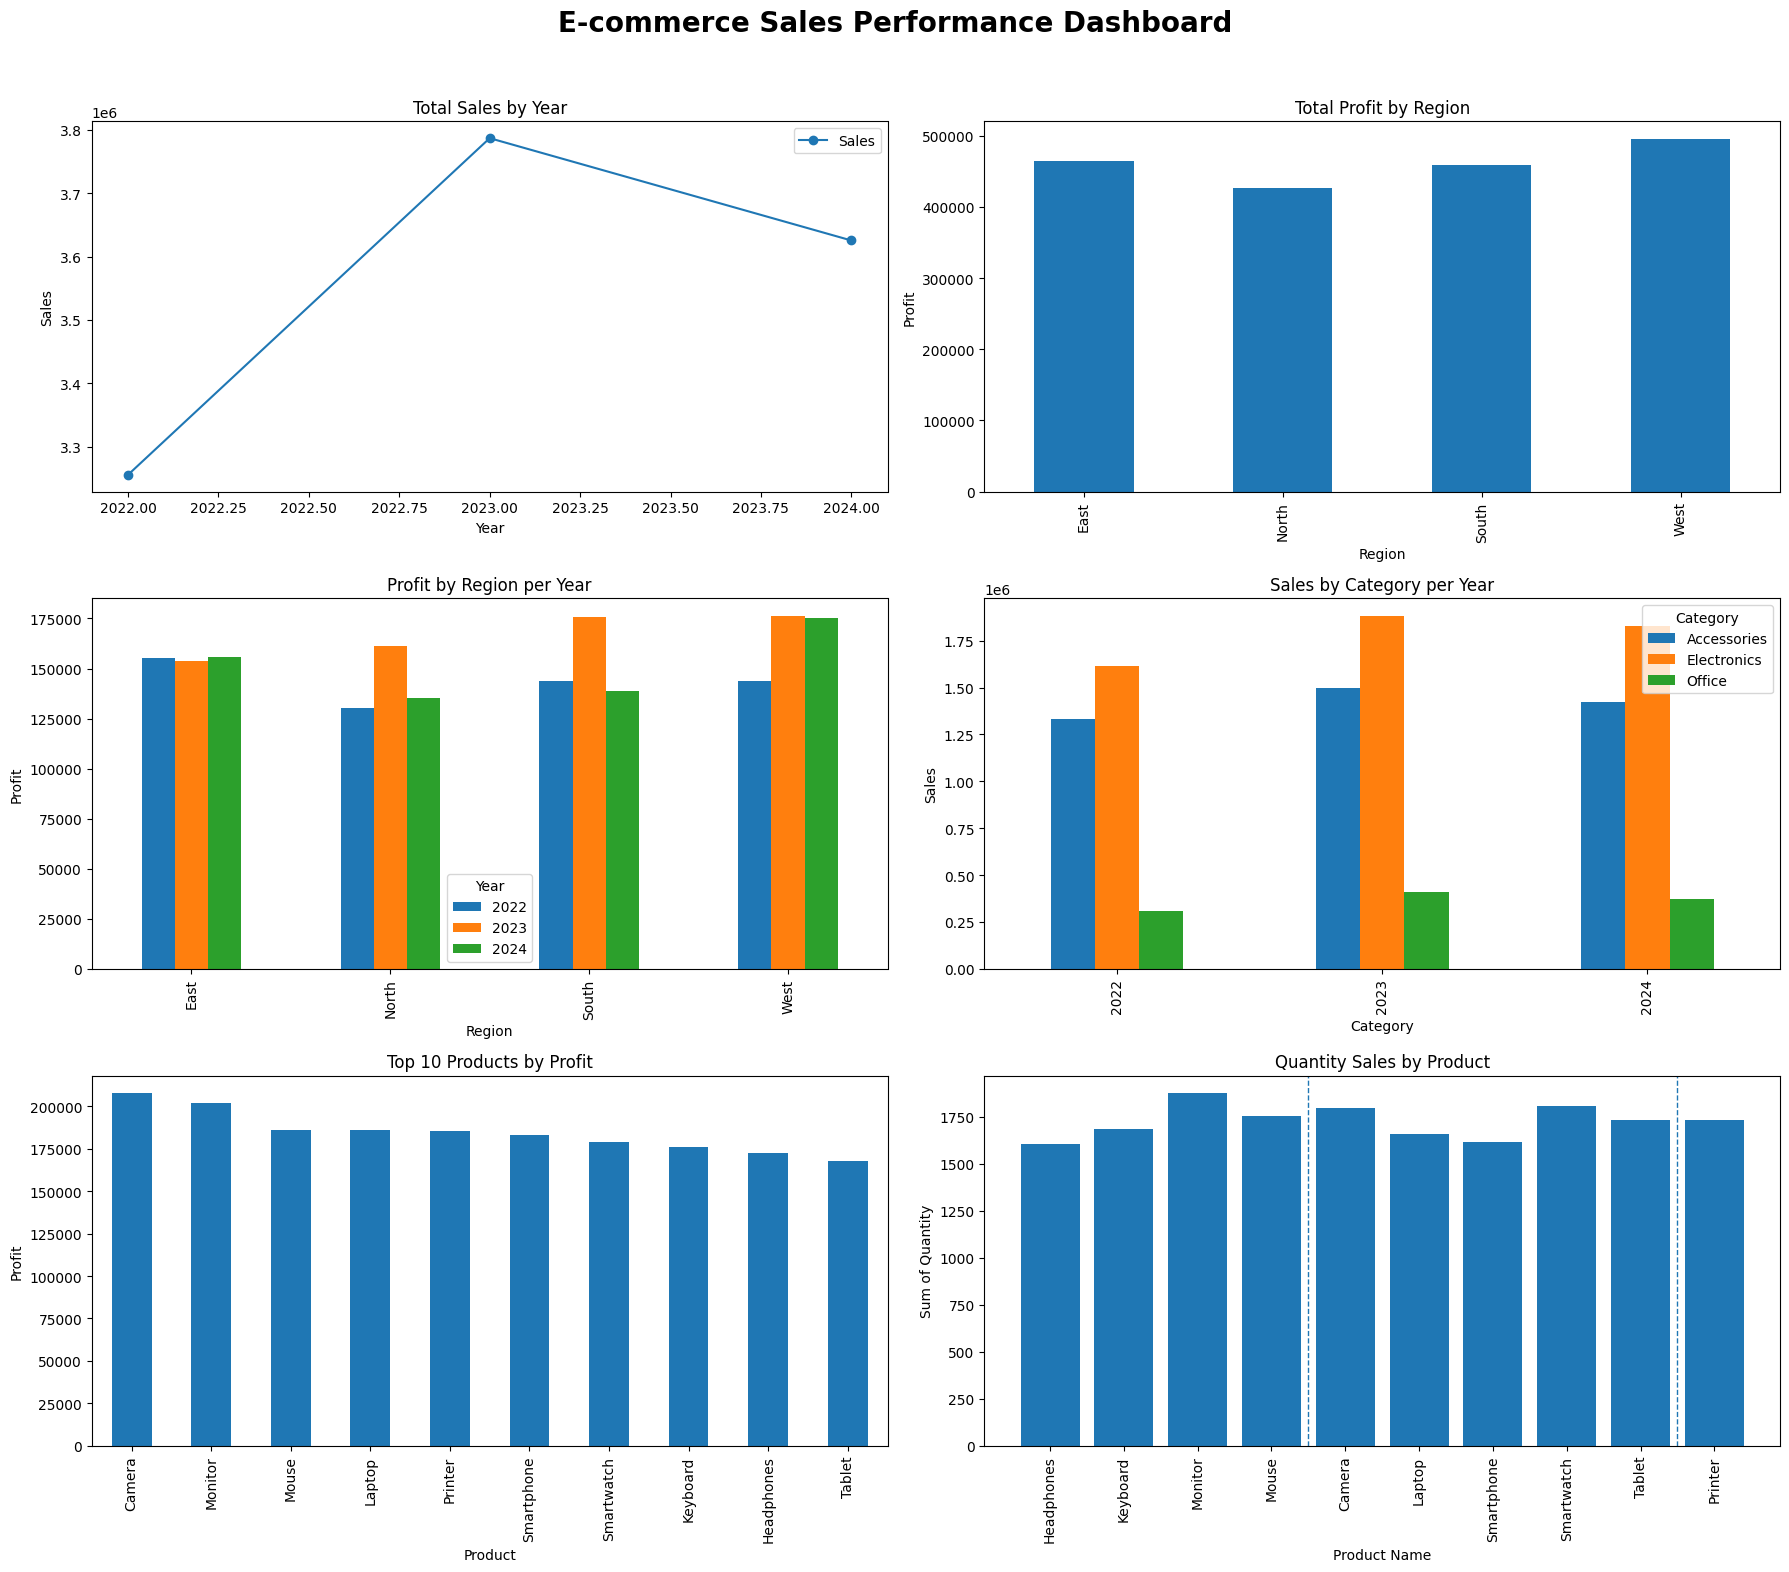

In [104]:
fig, axes = plt.subplots(3, 2, figsize=(18, 16))
fig.suptitle("E-commerce Sales Performance Dashboard", fontsize=20, fontweight='bold')

# 1 Sales by Year
sales_by_year.plot(kind='line', marker='o', ax=axes[0, 0])
axes[0, 0].set_title("Total Sales by Year")
axes[0, 0].set_xlabel("Year")
axes[0, 0].set_ylabel("Sales")

# 2 Profit by Region
profit_by_region.plot(kind='bar', ax=axes[0, 1], legend=False)
axes[0, 1].set_title("Total Profit by Region")
axes[0, 1].set_xlabel("Region")
axes[0, 1].set_ylabel("Profit")

# 3 Profit by Region per Year
profit_by_region_year.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title("Profit by Region per Year")
axes[1, 0].set_xlabel("Region")
axes[1, 0].set_ylabel("Profit")

# 4 Sales by Category per Year
sales_category_year.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title("Sales by Category per Year")
axes[1, 1].set_xlabel("Category")
axes[1, 1].set_ylabel("Sales")

# 5 Profit by Product (Top 10 only to keep it readable)
profit_by_product.head(10).plot(kind='bar', ax=axes[2, 0], legend=False)
axes[2, 0].set_title("Top 10 Products by Profit")
axes[2, 0].set_xlabel("Product")
axes[2, 0].set_ylabel("Profit")

# 6 Quantity Sales 

# Sort for clean grouping
quantity_product_category = quantity_product_category.sort_values(
    by=['Category', 'Product Name']
)

# X positions and values
x = np.arange(len(quantity_product_category))
y = quantity_product_category['Quantity']

# Plot inside dashboard axis
axes[2, 1].bar(x, y)

# X-axis labels
axes[2, 1].set_xticks(x)
axes[2, 1].set_xticklabels(
    quantity_product_category['Product Name'],
    rotation=90
)

# Titles and labels
axes[2, 1].set_title("Quantity Sales by Product")
axes[2, 1].set_xlabel("Product Name")
axes[2, 1].set_ylabel("Sum of Quantity")

# Optional: visual separators between categories
categories = quantity_product_category['Category'].values
for i in range(1, len(categories)):
    if categories[i] != categories[i - 1]:
        axes[2, 1].axvline(i - 0.5, linestyle='--', linewidth=1)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()